# IMT 547 Project: Preliminary Analysis

Team 1

02/19/2024

<style type = "text/css">  
    body {
        font-family: "Serif"; 
        font-size: 12pt;
    }
    em {
        color: #4E7F9E;
    }
    strong {
        color: #436D87;
    }
    /*
    li {
        color: #4E7F9E;
    }
    */
    img {
        display: block;
        margin: auto;
    } 
    .jp-RenderedHTMLCommon a:link { 
        color: #94C1C9;
    }
    .jp-RenderedHTMLCommon a:visited { 
        color: #94C1C9;
    }
    .jp-RenderedHTMLCommon code {
        color: #4E7F9E;
    }  
    .mark {
        color: #B00D00;
        background-color: #FFF7B1;
    }
</style>

In [1]:
# Import the libraries
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

# Configuration and setup
warnings.filterwarnings("ignore", category = FutureWarning)

## 0. Load the Data

In [2]:
# Load the data
yt = pd.read_csv("../data/yt_labeled.csv")
yt.head(2)

,channel_id,channel_name,video_id,video_title,video_creation_time,video_description,video_tags,video_viewcount,video_likecount,video_commentcount,...,profanity,threat,neg,neu,pos,compound,polarity,subjectivity,negative_emotion,positive_emotion
0,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,F-yEoHL7MYY,I t̶r̶i̶e̶d̶ ̶t̶o̶ beat Elden Ring Without Dyi...,2022-04-30 16:40:18+00:00,🌏 Get exclusive NordVPN deal here ➵ https://N...,"['pewdiepie', 'pewds', 'pewdie']",11533976,472939,15131,...,0.591665,0.012544,0.219,0.351,0.43,0.34,0.3,0.3,0.0,0.142857
1,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,F-yEoHL7MYY,I t̶r̶i̶e̶d̶ ̶t̶o̶ beat Elden Ring Without Dyi...,2022-04-30 16:40:18+00:00,🌏 Get exclusive NordVPN deal here ➵ https://N...,"['pewdiepie', 'pewds', 'pewdie']",11533976,472939,15131,...,0.064959,0.025099,0.000,1.000,0.00,0.00,0.0,0.0,0.0,0.000000


In [3]:
# Check the dimensions
print(f"Number of rows: {yt.shape[0]}\n"
      f"Number of columns: {yt.shape[1]}\n")

# Check for missing values
print(f"Number of missing values: {yt.isna().sum().sum()}")

Number of rows: 129188
Number of columns: 33

Number of missing values: 0


<br>

## 1. Summary Statistics

In [4]:
# Check the time range
yt["video_creation_time"].min(), yt["video_creation_time"].max()

('2011-04-22 01:05:52+00:00', '2024-02-18 20:15:11+00:00')

In [5]:
# Number of unique channels
print(f"Number of unique channels: {yt['channel_id'].nunique()}")

Number of unique channels: 33


In [6]:
# Number of unique videos
print(f"Number of unique videos: {yt['video_id'].nunique()}")

Number of unique videos: 1420


In [7]:
# Print the summary statistics
yt.describe()

,video_viewcount,video_likecount,video_commentcount,comment_likecount,comment_replycount,toxicity,severe_toxicity,identity_attack,insult,profanity,threat,neg,neu,pos,compound,polarity,subjectivity,negative_emotion,positive_emotion
count,1.291880e+05,1.291880e+05,129188.000000,129188.000000,129188.000000,129188.000000,129188.000000,129188.000000,129188.000000,129188.000000,129188.000000,129188.000000,129188.000000,129188.000000,129188.000000,129188.000000,129188.000000,129188.000000,129188.000000
mean,3.688107e+06,1.203317e+05,7061.832275,26.066012,0.849522,0.133909,0.016251,0.021453,0.060135,0.085713,0.030112,0.095243,0.692882,0.211877,0.107892,0.257947,0.257947,0.024225,0.023366
std,5.863548e+06,1.675912e+05,11641.956027,1282.760697,17.602877,0.162258,0.054610,0.051529,0.109013,0.136673,0.076938,0.202652,0.318919,0.288068,0.368621,0.329635,0.329635,0.090899,0.093398
min,1.035300e+04,1.580000e+02,15.000000,0.000000,0.000000,0.002121,0.000283,0.000365,0.005556,0.008845,0.005366,0.000000,0.000000,0.000000,-0.999800,0.000000,0.000000,0.000000,0.000000
25%,6.667980e+05,1.866700e+04,882.000000,0.000000,0.000000,0.029799,0.002050,0.005217,0.011807,0.020784,0.008285,0.000000,0.435000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.900779e+06,5.566700e+04,2600.000000,0.000000,0.000000,0.059975,0.003395,0.007807,0.018774,0.029888,0.009567,0.000000,0.722000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.318849e+06,1.442980e+05,8544.000000,0.000000,0.000000,0.177184,0.008049,0.015255,0.044422,0.083228,0.012544,0.000000,1.000000,0.407000,0.361200,0.500000,0.500000,0.000000,0.000000
max,1.086641e+08,1.584318e+06,151324.000000,324733.000000,679.000000,0.988079,0.666987,0.844343,0.898717,0.960281,0.853538,1.000000,1.000000,1.000000,0.999900,1.000000,1.000000,1.000000,1.000000


### 1.1 Toxicity Score Distribution

In [8]:
# Average toxicity
toxicity_cols = ["toxicity", "severe_toxicity", "identity_attack", "insult", "profanity", "threat"]
yt[toxicity_cols].mean()

toxicity           0.133909
severe_toxicity    0.016251
identity_attack    0.021453
insult             0.060135
profanity          0.085713
threat             0.030112
dtype: float64

In [9]:
# Define the threshold alpha
alpha = 0.3

# Create binary labels for toxicity
for col in toxicity_cols:
    yt[f"is_{col}"] = yt[col] > alpha          

In [10]:
# Number of columns exhibiting toxicity
toxicity_cols = ["is_toxicity", "is_severe_toxicity", 
                 "is_identity_attack", "is_insult", 
                 "is_profanity", "is_threat"]
yt[toxicity_cols].sum()

is_toxicity           17770
is_severe_toxicity     1883
is_identity_attack     1055
is_insult              7028
is_profanity           7876
is_threat              3627
dtype: int64

In [11]:
# Proportion of toxic comments
yt[toxicity_cols].sum() / yt.shape[0]

is_toxicity           0.137551
is_severe_toxicity    0.014576
is_identity_attack    0.008166
is_insult             0.054401
is_profanity          0.060965
is_threat             0.028075
dtype: float64

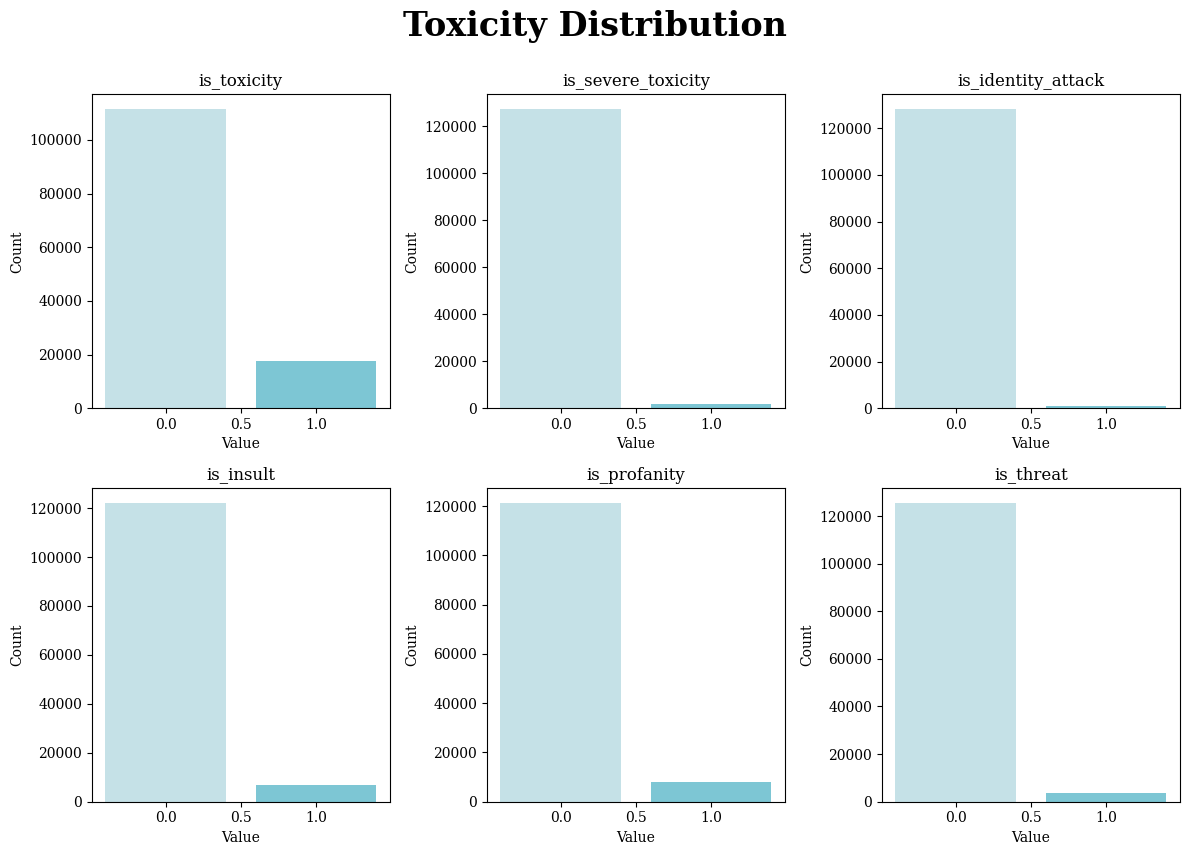

In [12]:
# Set up the figure with subplots
plt.rcParams.update({"font.family": "serif"})
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (12, 8.5))

# Visualize the class distribution for each column
for i, col in enumerate(toxicity_cols):
    counts = yt[col].value_counts()
    axes[i // 3, i % 3].bar(counts.index, counts.values, color = ["#C5E1E7", "#7DC6D4"])
    axes[i // 3, i % 3].set_title(col)
    axes[i // 3, i % 3].set_xlabel("Value")
    axes[i // 3, i % 3].set_ylabel("Count")

# Display the plot
fig.suptitle("Toxicity Distribution", 
             size = 24, weight = "bold", y = 1)
fig.tight_layout()
plt.show()

<br>

### 1.2 Sentiment Score Distribution

#### VADER Sentiment

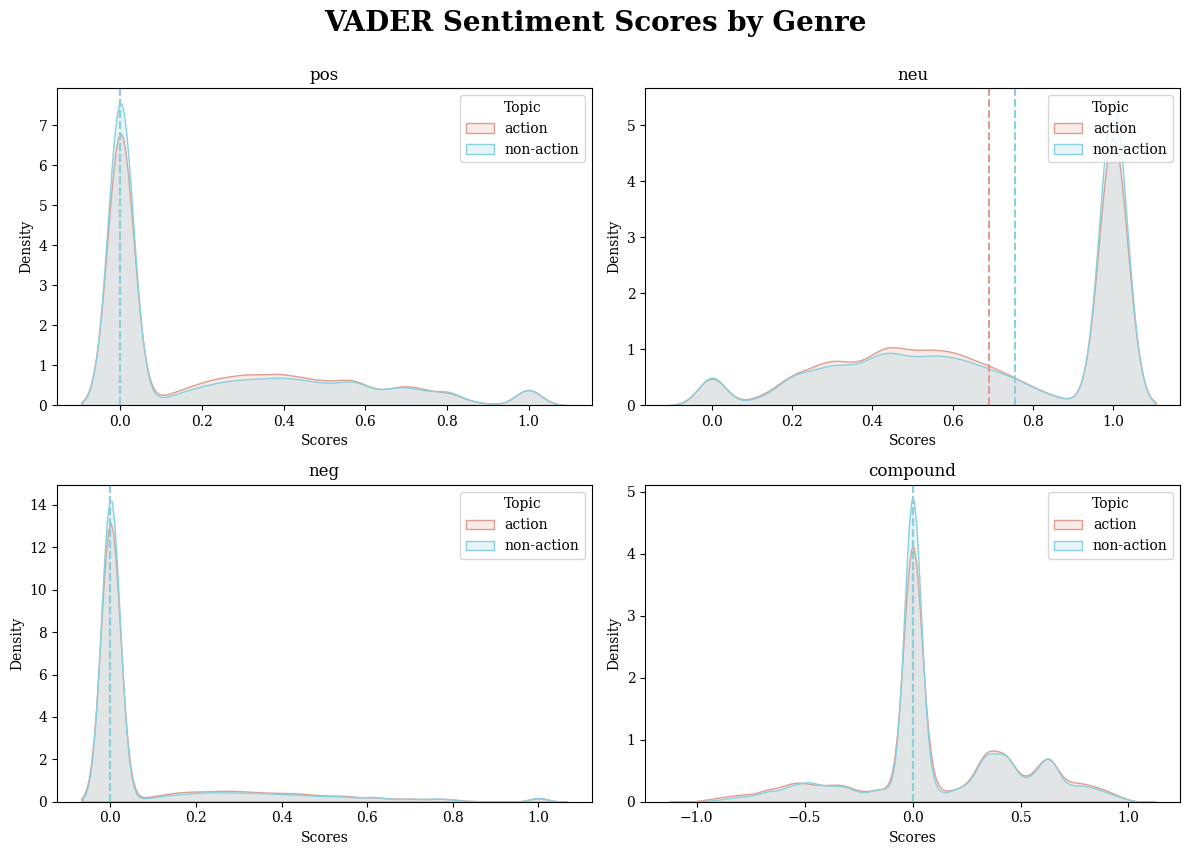

In [13]:
# Columns to plot
vader_cols = ["pos", "neu", "neg", "compound"]

# Set up the figure with subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 8.5))

# Set the color scheme
colors = {"action": "#DE9D90", "non-action": "#89D0DE"}

# Visualize the distribution of data by channel
for i, col in enumerate(vader_cols):
    for genre, group in yt.groupby("genre"):
        # Plot the density plot
        sns.kdeplot(group[col], ax = axes[i // 2, i % 2], 
                    fill = True, color = colors[genre], alpha = 0.2,
                    label = genre)
        # Plot the median line
        axes[i // 2, i % 2].axvline(group[col].median(), 
                        linestyle = "--", 
                        color = colors[genre])
    axes[i // 2, i % 2].set_title(col)
    axes[i // 2, i % 2].set_xlabel("Scores")
    axes[i // 2, i % 2].set_ylabel("Density")
    axes[i // 2, i % 2].legend(title = "Topic")

# Display the plot
fig.suptitle("VADER Sentiment Scores by Genre", 
             size = 20, weight = "bold", y = 1)
fig.tight_layout()
plt.show()

#### TextBlob Sentiment

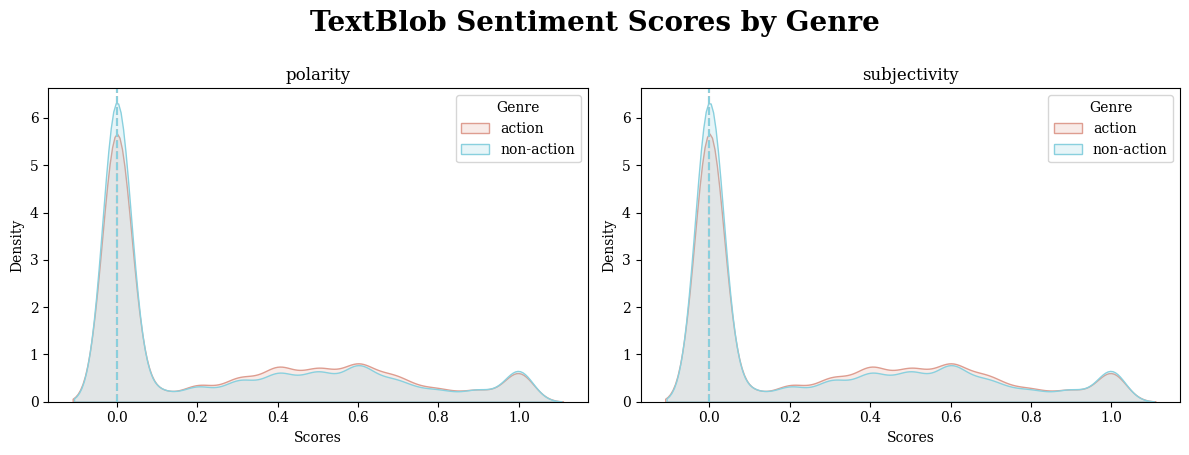

In [14]:
# Columns to plot
textblob_cols = ["polarity", "subjectivity"]

# Set up the figure with subplots
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4.5))

# Set the color scheme
colors = {"action": "#DE9D90", "non-action": "#89D0DE"}

# Visualize the distribution of data by genre
for i, col in enumerate(textblob_cols):
    for genre, group in yt.groupby("genre"):
        # Plot the density plot
        sns.kdeplot(group[col], ax = axes[i], 
                    fill = True, color = colors[genre], alpha = 0.2,
                    label = genre)
        # Plot the median line
        axes[i].axvline(group[col].median(), 
                        linestyle = "--", 
                        color = colors[genre])
    axes[i].set_title(col)
    axes[i].set_xlabel("Scores")
    axes[i].set_ylabel("Density")
    axes[i].legend(title = "Genre")

# Display the plot
fig.suptitle("TextBlob Sentiment Scores by Genre", 
             size = 20, weight = "bold", y = 1)
fig.tight_layout()
plt.show()

#### Empath Sentiment

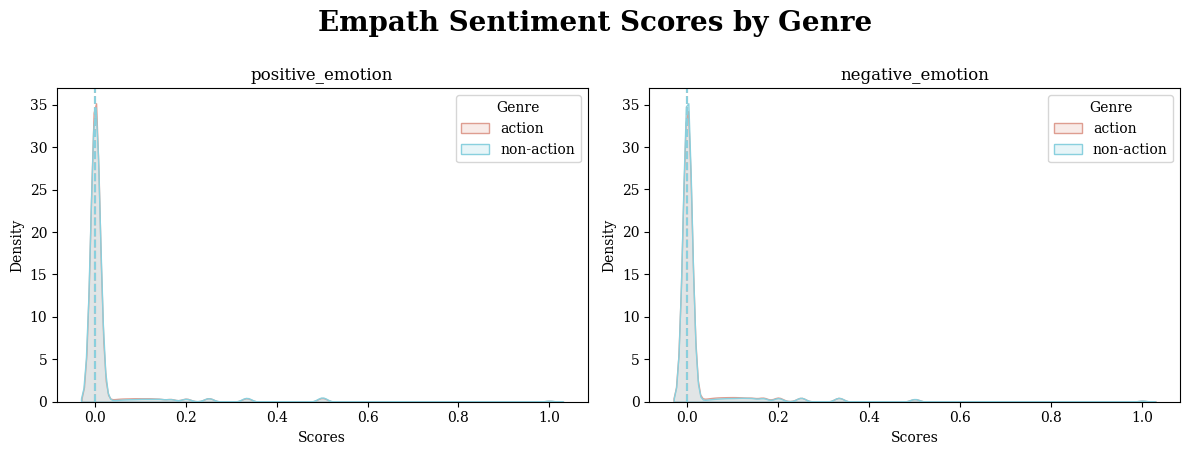

In [15]:
# Columns to plot
empath_cols = ["positive_emotion", "negative_emotion"]

# Set up the figure with subplots
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4.5))

# Set the color scheme
colors = {"action": "#DE9D90", "non-action": "#89D0DE"}

# Visualize the distribution of data by genre
for i, col in enumerate(empath_cols):
    for genre, group in yt.groupby("genre"):
        # Plot the density plot
        sns.kdeplot(group[col], ax = axes[i], 
                    fill = True, color = colors[genre], alpha = 0.2,
                    label = genre)
        # Plot the median line
        axes[i].axvline(group[col].median(), 
                        linestyle = "--", 
                        color = colors[genre])
    axes[i].set_title(col)
    axes[i].set_xlabel("Scores")
    axes[i].set_ylabel("Density")
    axes[i].legend(title = "Genre")

# Display the plot
fig.suptitle("Empath Sentiment Scores by Genre", 
             size = 20, weight = "bold", y = 1)
fig.tight_layout()
plt.show()

<br>

### 1.3 Engagement Metrics Distribution

#### All Comments

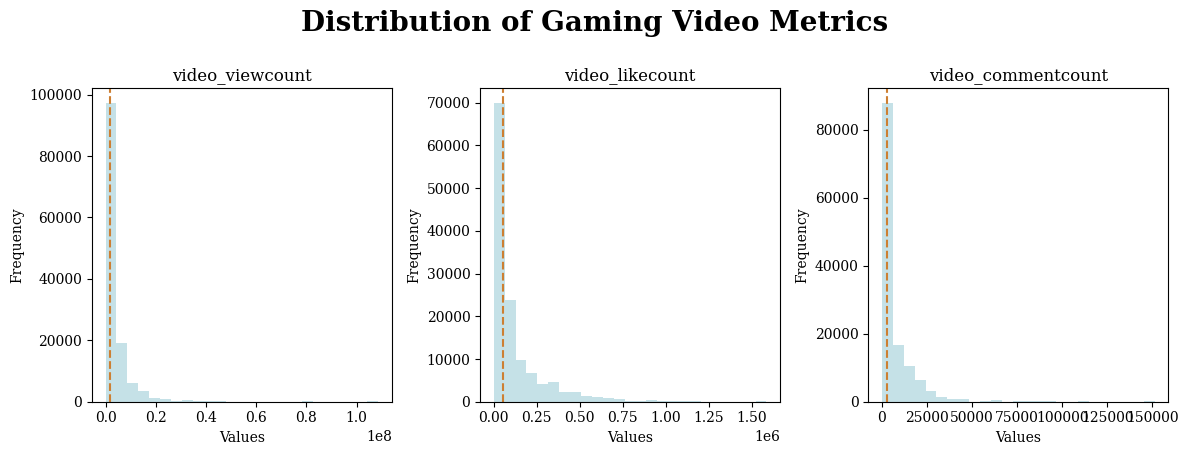

In [16]:
# Columns to plot
video_cols = ["video_viewcount", "video_likecount", "video_commentcount"]

# Set up the figure with subplots
plt.rcParams.update({"font.family": "serif"})
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 4.5))

# Visualize the distribution of video metrics
for i, col in enumerate(video_cols):
    # Plot the histogram
    axes[i].hist(yt[col], bins = 25, color = "#C5E1E7")
    # Plot the median line
    axes[i].axvline(yt[col].median(), color = "#CD7F32", linestyle = "--")
    axes[i].set_title(col)
    axes[i].set_xlabel("Values")
    axes[i].set_ylabel("Frequency")
    
# Display the plot
fig.suptitle("Distribution of Gaming Video Metrics", 
             size = 20, weight = "bold", y = 1)
fig.tight_layout()
plt.show()

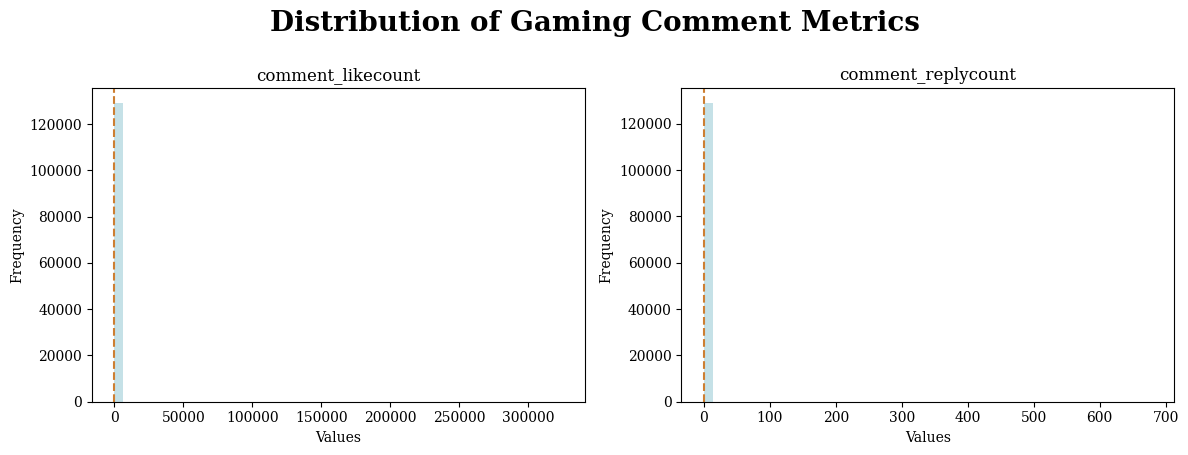

In [17]:
# Columns to plot
comment_cols = ["comment_likecount", "comment_replycount"]

# Set up the figure with subplots
plt.rcParams.update({"font.family": "serif"})
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4.5))

# Visualize the distribution of comment metrics
for i, col in enumerate(comment_cols):
    # Plot the histogram
    axes[i].hist(yt[col], bins = 50, color = "#C5E1E7")
    
    # Plot the median line
    axes[i].axvline(yt[col].median(), color = "#CD7F32", linestyle = "--")
    axes[i].set_title(col)
    axes[i].set_xlabel("Values")
    axes[i].set_ylabel("Frequency")
    
# Display the plot
fig.suptitle("Distribution of Gaming Comment Metrics", 
             size = 20, weight = "bold", y = 1)
fig.tight_layout()
plt.show()

#### Action vs Non-Action

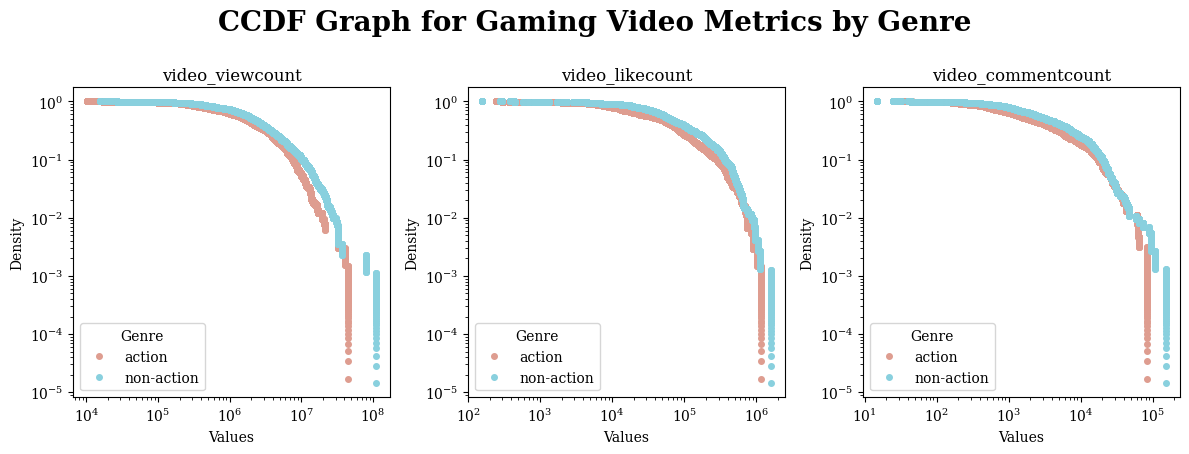

In [18]:
# Set up the figure with subplots
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 4.5))

# Set the color scheme
colors = {"action": "#DE9D90", "non-action": "#89D0DE"}

# Visualize the CCDFs by genre
for i, col in enumerate(video_cols):
    for genre, group in yt.groupby("genre"):
        # Sort data
        sorted_data = np.sort(group[col])
        # Calculate CCDF
        ccdf = 1. - np.arange(1, len(sorted_data) + 1) / len(sorted_data)
        # Plot
        axes[i].loglog(sorted_data, ccdf, label=genre, color=colors[genre], marker='o', linestyle='', markersize=4)
       
    axes[i].set_title(col)
    axes[i].set_xlabel("Values")
    axes[i].set_ylabel("Density")
    axes[i].legend(title = "Genre")

# Display the plot
fig.suptitle("CCDF Graph for Gaming Video Metrics by Genre", 
             size = 20, weight = "bold", y = 1)
fig.tight_layout()
plt.show()

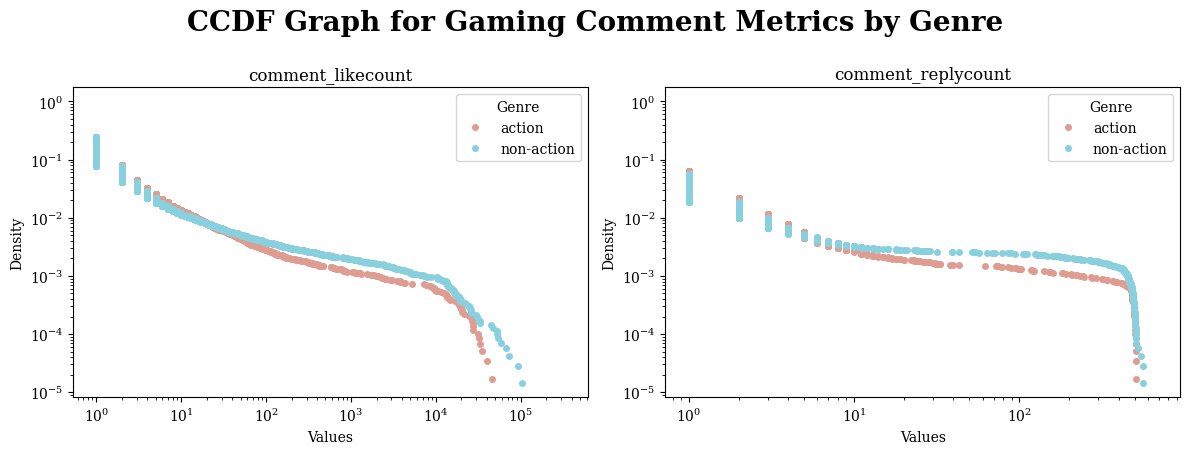

In [19]:
# Set up the figure with subplots
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4.5))

# Set the color scheme
colors = {"action": "#DE9D90", "non-action": "#89D0DE"}

# Visualize the CCDFs by genre
for i, col in enumerate(comment_cols):
    for genre, group in yt.groupby("genre"):
        # Sort data
        sorted_data = np.sort(group[col])
        # Calculate CCDF
        ccdf = 1. - np.arange(1, len(sorted_data) + 1) / len(sorted_data)
        # Plot
        axes[i].loglog(sorted_data, ccdf, label=genre, color=colors[genre], marker='o', linestyle='', markersize=4)
       
    axes[i].set_title(col)
    axes[i].set_xlabel("Values")
    axes[i].set_ylabel("Density")
    axes[i].legend(title = "Genre")

# Display the plot
fig.suptitle("CCDF Graph for Gaming Comment Metrics by Genre", 
             size = 20, weight = "bold", y = 1)
fig.tight_layout()
plt.show()

**Complementary Cumulative Distribution Function (CCDF)**: Gives the probability that a random variable $X$ takes on a value greater than $x$.  

$CCDF(x) = 1 - F(x) = P(X > x)$

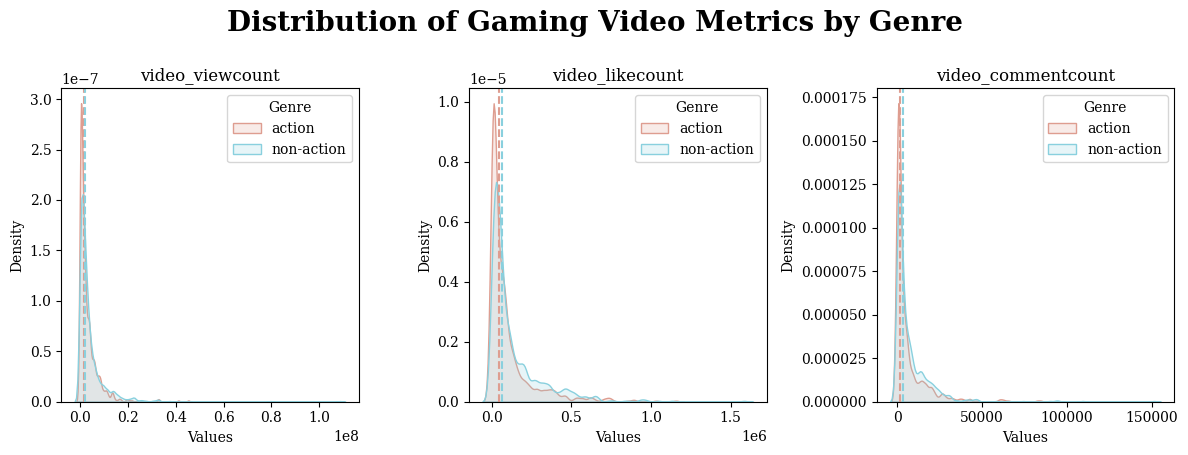

In [20]:
# Set up the figure with subplots
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 4.5))

# Set the color scheme
colors = {"action": "#DE9D90", "non-action": "#89D0DE"}

# Visualize the distribution of data by genre
for i, col in enumerate(video_cols):
    for genre, group in yt.groupby("genre"):
        # Plot the density plot
        sns.kdeplot(group[col], ax = axes[i], 
                    fill = True, color = colors[genre], alpha = 0.2,
                    label = genre)
        # Plot the median line
        axes[i].axvline(group[col].median(), 
                        linestyle = "--", 
                        color = colors[genre])
    axes[i].set_title(col)
    axes[i].set_xlabel("Values")
    axes[i].set_ylabel("Density")
    axes[i].legend(title = "Genre")

# Display the plot
fig.suptitle("Distribution of Gaming Video Metrics by Genre", 
             size = 20, weight = "bold", y = 1)
fig.tight_layout()
plt.show()

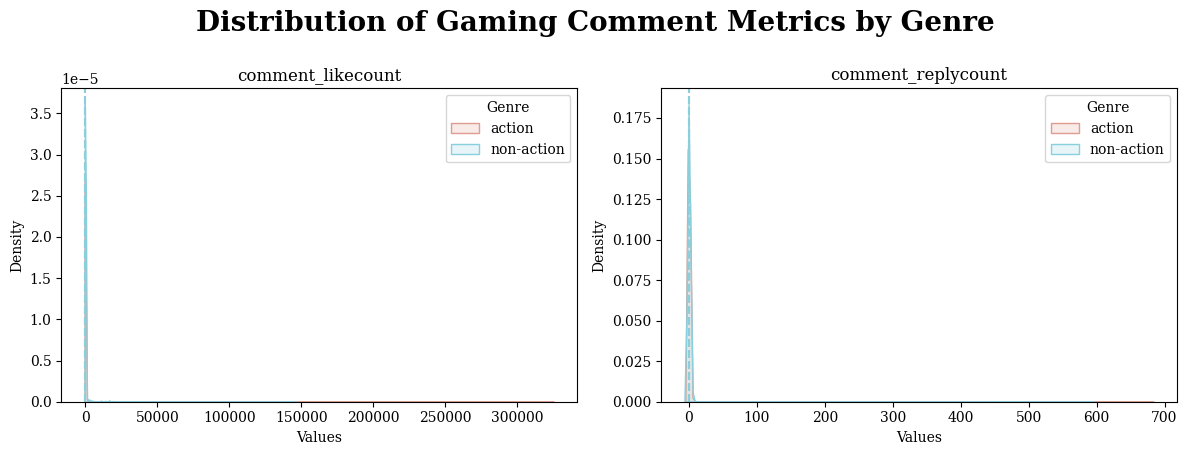

In [21]:
# Set up the figure with subplots
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4.5))

# Set the color scheme
colors = {"action": "#DE9D90", "non-action": "#89D0DE"}

# Visualize the distribution of data by genre
for i, col in enumerate(comment_cols):
    for genre, group in yt.groupby("genre"):
        # Plot the density plot
        sns.kdeplot(group[col], ax = axes[i], 
                    fill = True, color = colors[genre], alpha = 0.2,
                    label = genre)
        # Plot the median line
        axes[i].axvline(group[col].median(), 
                        linestyle = "--", 
                        color = colors[genre])
    axes[i].set_title(col)
    axes[i].set_xlabel("Values")
    axes[i].set_ylabel("Density")
    axes[i].legend(title = "Genre")

# Display the plot
fig.suptitle("Distribution of Gaming Comment Metrics by Genre", 
             size = 20, weight = "bold", y = 1)
fig.tight_layout()
plt.show()

<br>

### 1.4 Word Cloud

In [22]:
# Import the libraries
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

In [23]:
# Concatenate the improvements text
all_comments = " ".join(yt["cleaned_comment"])
all_action_comments = "".join(yt["cleaned_comment"][yt["genre"] == "action"])
all_nonaction_comments = "".join(yt["cleaned_comment"][yt["genre"] == "non-action"])

In [24]:
def generate_wordcloud(text, image_path="../image/yt.png", 
                       min_font_size=30, max_font_size=135,
                       max_words=250):
    """
    Generate and display a word cloud for a given text.  
    """

    # Create the mask
    mask = np.array(Image.open(image_path))

    # Grab the mask colors
    colors = ImageColorGenerator(mask)

    # Define the wordcloud
    cloud = WordCloud(mask = mask,
                      background_color = "white",
                      color_func = colors, 
                      font_path = "../asset/Montserrat-Medium.ttf",
                      min_font_size = min_font_size, 
                      max_font_size = max_font_size, 
                      max_words = max_words).generate(text)

    # Plot the wordcloud
    fig = plt.figure(figsize = (16,12))
    _ = plt.imshow(cloud)
    _ = plt.axis("off")
    plt.show()

#### All Comments

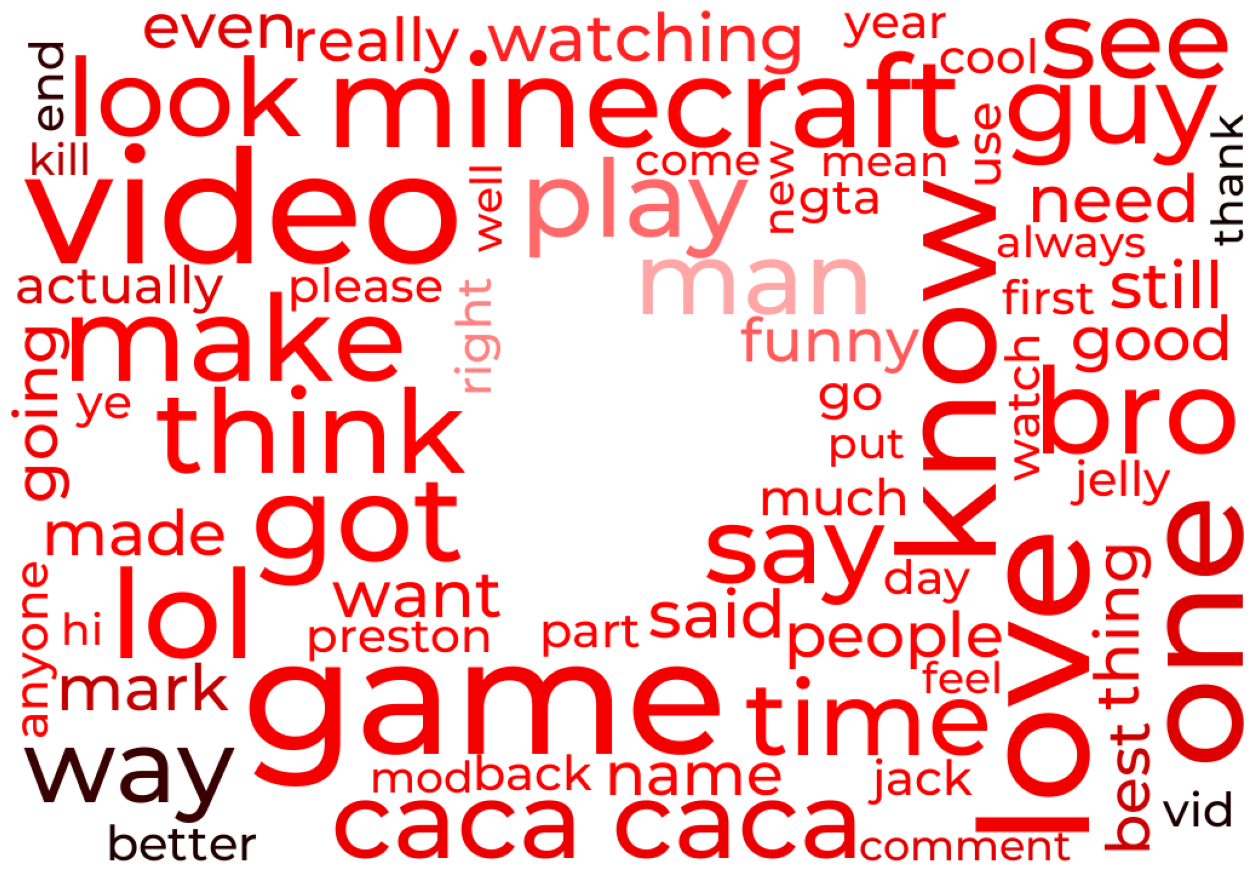

In [25]:
# Word Cloud for all comments
generate_wordcloud(all_comments)

In [26]:
# Set up the vectorizer and remove the stop words
vectorizer = CountVectorizer(stop_words = "english")

# Create the DTM
DTM = vectorizer.fit_transform([all_comments])

# Retrieve the feature names
vocabulary = vectorizer.get_feature_names_out()

# Sort the words by the number of occurrences
DTM_sorted = pd.Series(np.squeeze(DTM.toarray()), index = vocabulary)
DTM_sorted.sort_values(ascending = False, inplace = True)
DTM_sorted.head(10)

like         9077
love         6164
game         5775
play         4865
minecraft    4826
video        4745
know         3571
make         3391
watching     3077
videos       2950
dtype: int64

#### Action vs Non-Action

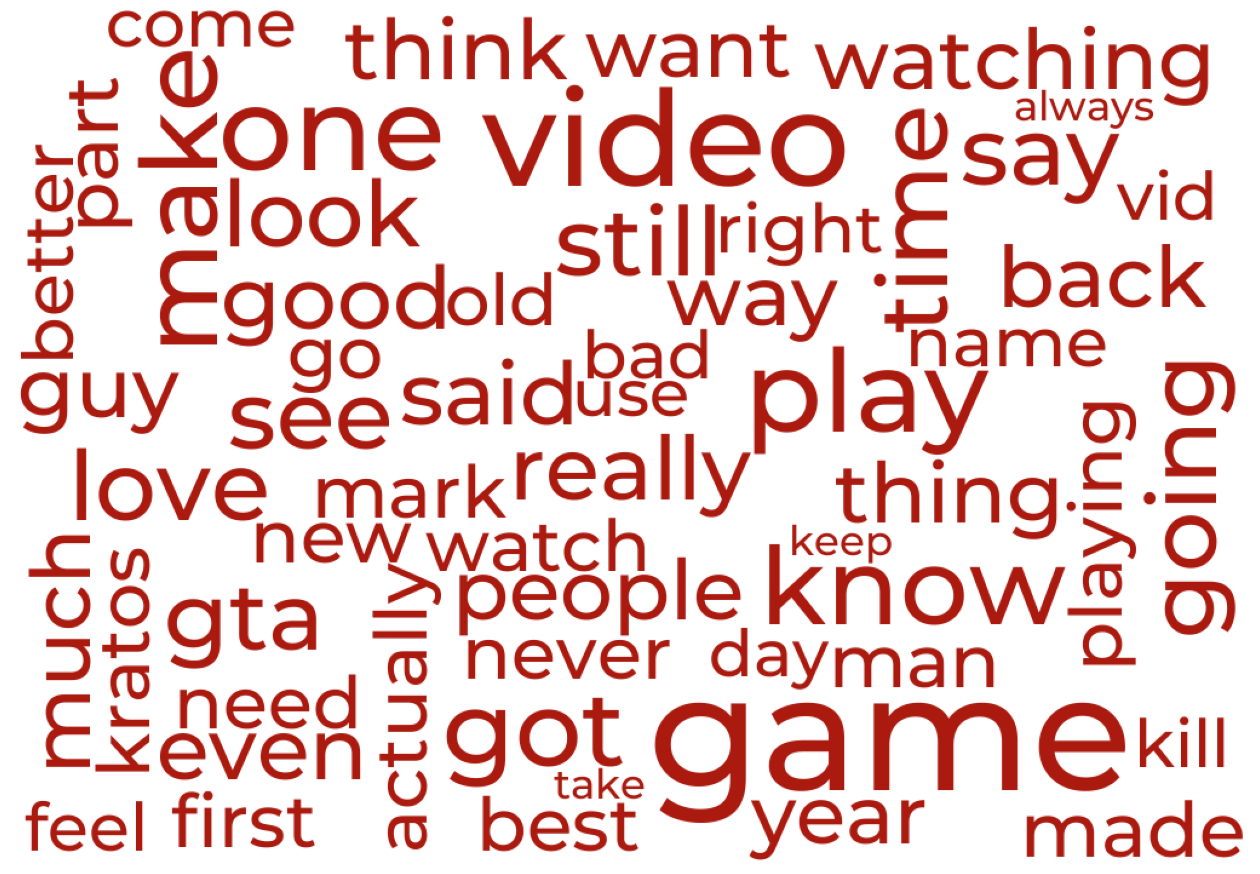

In [27]:
# Word Cloud for all action comments
generate_wordcloud(all_action_comments, "../image/red.png")

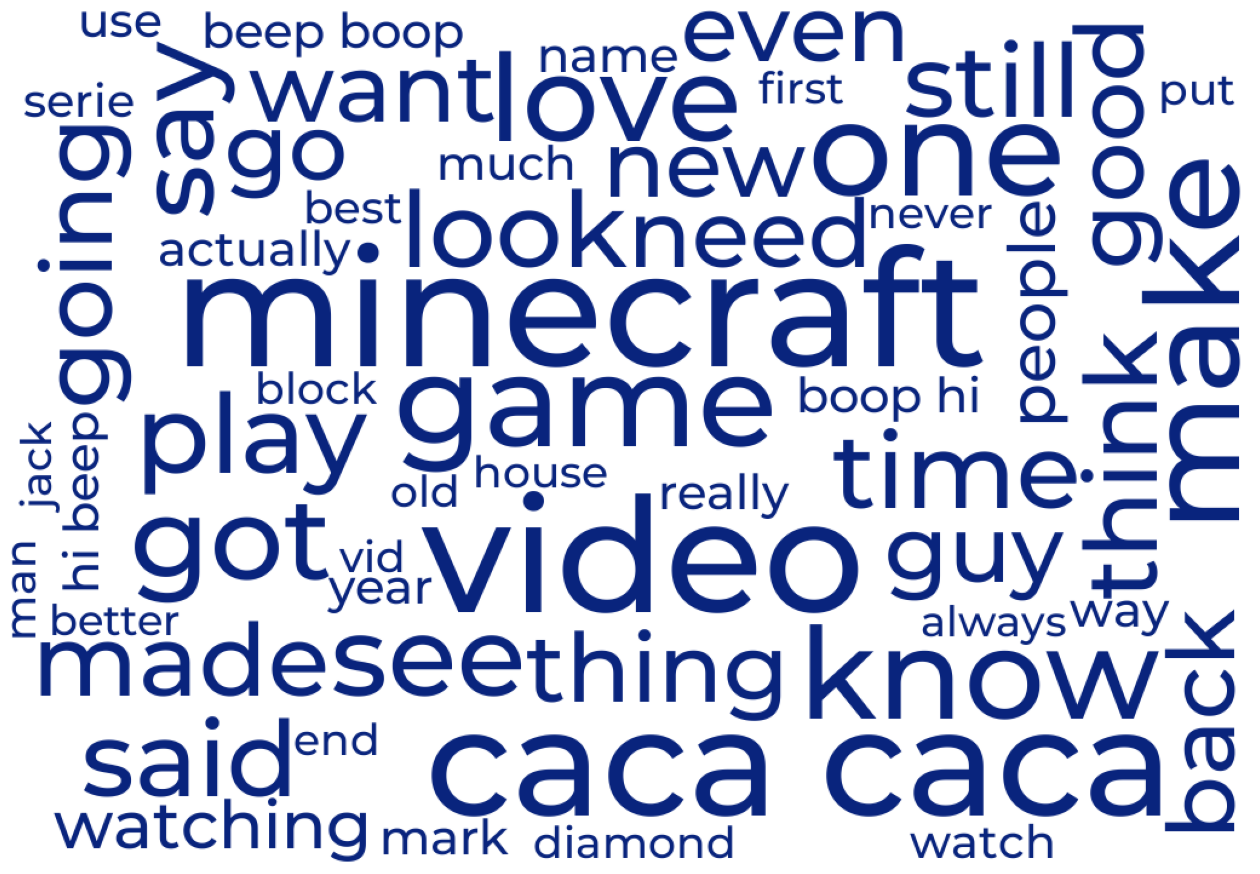

In [28]:
# Word Cloud for all non-action comments
generate_wordcloud(all_nonaction_comments, "../image/blue.png")